<a href="https://colab.research.google.com/github/Albatross3/ML_Project/blob/main/Clustering_LDJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pandas as pd
import pickle as pk
import numpy as np

In [ ]:
!pip install pandas==1.3.5

     |████████████████████████████████| 11.3 MB 5.4 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.5 which is incompatible.


In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pd.__version__

'1.3.5'

In [ ]:
ROOT = '/content/drive/MyDrive/Colab Notebooks/ML_Project/'

In [ ]:
data=pd.DataFrame()
f=open(f"{ROOT}final3.pkl","rb")
data=pk.load(f)
data

,혼인,이혼,출생,사망,통화량,유치원 수,사설학원 수(인구 1000명당),순이동,자가용(합계),이륜차(자가용),누적 보관소,누적 거치대,누적 노래방 수,누적 영화관 수,누적 pc방 수,동물병원,병원,약국,의원,휴게음식점,일반음식점,학교
2014.01/강남구,299,71,425,150,1937045.6,40,3.7,75,"212,483","16,586",0,0,322,85,167,72,64,372,2322,2685,10946,82
2014.01/강동구,260,65,379,186,1937045.6,39,1.5,-461,"131,229","17,240",0,0,281,19,196,38,28,225,695,704,4097,60
2014.01/강북구,164,54,217,167,1937045.6,24,0.7,-539,"69,277","21,686",0,0,345,15,335,21,16,163,403,373,3723,37
2014.01/강서구,358,99,543,218,1937045.6,46,1.1,-201,"161,207","17,890",0,0,338,18,195,43,31,226,641,866,4636,85
2014.01/관악구,309,69,398,176,1937045.6,36,0.9,-641,"112,704","23,920",0,0,320,13,224,26,10,216,650,678,4451,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020.12/용산구,106,37,93,117,3197671.2,13,0.7,-86,"76,624","16,570",80,975,80,28,25,29,3,131,314,1019,4675,39
2020.12/은평구,218,65,165,201,3197671.2,42,1.1,-756,"124,829","21,150",80,927,207,24,410,39,24,213,657,1227,3703,69
2020.12/종로구,53,23,29,77,3197671.2,17,1.6,-95,"44,697","12,762",101,1153,103,36,44,15,8,181,483,1696,7124,47
2020.12/중구,74,19,40,67,3197671.2,14,0.9,-253,"45,710","14,188",78,931,75,56,169,17,12,168,544,2289,6273,36


#전처리 과정
object type을 int type으로 변환
standardization(표준화)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2100 entries, 2014.01/강남구 to 2020.12/중랑구
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   혼인                 2100 non-null   int64  
 1   이혼                 2100 non-null   int64  
 2   출생                 2100 non-null   int64  
 3   사망                 2100 non-null   int64  
 4   통화량                2100 non-null   float64
 5   유치원 수              2100 non-null   int64  
 6   사설학원 수(인구 1000명당)  2100 non-null   float64
 7   순이동                2100 non-null   object 
 8   자가용(합계)            2100 non-null   object 
 9   이륜차(자가용)           2100 non-null   object 
 10  누적 보관소             2100 non-null   int64  
 11  누적 거치대             2100 non-null   int64  
 12  누적 노래방 수           2100 non-null   int64  
 13  누적 영화관 수           2100 non-null   int64  
 14  누적 pc방 수           2100 non-null   int64  
 15  동물병원               2100 non-null   int64  
 16  병원          

In [ ]:
data['순이동'] = data['순이동'].apply(lambda x: x.replace(',', ''))
data['자가용(합계)']=data['자가용(합계)'].apply(lambda x: x.replace(',', ''))
data['이륜차(자가용)']=data['이륜차(자가용)'].apply(lambda x: x.replace(',', ''))

In [ ]:
data['자가용(합계)']=data['자가용(합계)'].astype(int)
data['이륜차(자가용)']=data['이륜차(자가용)'].astype(int)

In [ ]:
#결측치 값 수정
data.loc["2018.03/영등포구", "순이동"] = '-208'
data['순이동']=data['순이동'].astype(int)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2100 entries, 2014.01/강남구 to 2020.12/중랑구
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   혼인                 2100 non-null   int64  
 1   이혼                 2100 non-null   int64  
 2   출생                 2100 non-null   int64  
 3   사망                 2100 non-null   int64  
 4   통화량                2100 non-null   float64
 5   유치원 수              2100 non-null   int64  
 6   사설학원 수(인구 1000명당)  2100 non-null   float64
 7   순이동                2100 non-null   int64  
 8   자가용(합계)            2100 non-null   int64  
 9   이륜차(자가용)           2100 non-null   int64  
 10  누적 보관소             2100 non-null   int64  
 11  누적 거치대             2100 non-null   int64  
 12  누적 노래방 수           2100 non-null   int64  
 13  누적 영화관 수           2100 non-null   int64  
 14  누적 pc방 수           2100 non-null   int64  
 15  동물병원               2100 non-null   int64  
 16  병원          

In [ ]:
#Standardization
from sklearn.preprocessing import StandardScaler

# Standardization 평균 0 / 분산 1
scaler = StandardScaler()   

scaler.fit(data)


StandardScaler()

In [ ]:
data_scaled = scaler.transform(data)
data_scaled

array([[ 1.49616119,  0.61481975,  2.05096723, ...,  2.34437263,
         3.23049686,  1.46414718],
       [ 0.99076179,  0.32130523,  1.58552492, ..., -0.76575179,
        -0.36942325,  0.21705366],
       [-0.25329828, -0.21680474, -0.0536415 , ..., -1.28541418,
        -0.56600233, -1.08672593],
       ...,
       [-1.69174274, -1.73329645, -1.95588402, ...,  0.79166539,
         1.22160583, -0.51986524],
       [-1.4196046 , -1.9289728 , -1.84458259, ...,  1.72266174,
         0.77430958, -1.143412  ],
       [-0.09779077,  0.37022431, -0.78215991, ..., -0.46117626,
        -0.56389988, -0.51986524]])

# K-Means clustering

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
kmeans=KMeans(n_clusters=5 ,n_init=100)
kmeans.fit(data_scaled)
inertia=kmeans.inertia_
print(inertia)

20197.88147352098


In [ ]:
inertia_arr=[]
silhouette_score_arr = []
kmeans_per_k = []
k_range=range(2,15)

for k in k_range:
    kmeans=KMeans(n_clusters=k, random_state=300)
    #k에 따라 학습시킨 결과인 kmeans
    kmeans_per_k.append(kmeans.fit(data_scaled))
    inertia=kmeans.inertia_
    score=silhouette_score(data_scaled,kmeans.labels_)
    print(f'k: {k}, inertia :{inertia:.4f}, silhouette_score: {score:.4f}')
    inertia_arr.append(inertia)
    silhouette_score_arr.append(score)
inertia_arr=np.array(inertia_arr)

k: 2, inertia :34732.4695, silhouette_score: 0.3401
k: 3, inertia :27904.6957, silhouette_score: 0.2192
k: 4, inertia :23501.8881, silhouette_score: 0.2477
k: 5, inertia :20197.8815, silhouette_score: 0.2350
k: 6, inertia :18628.2756, silhouette_score: 0.2283
k: 7, inertia :17493.2233, silhouette_score: 0.2099
k: 8, inertia :16446.6730, silhouette_score: 0.2214
k: 9, inertia :15281.8371, silhouette_score: 0.2340
k: 10, inertia :14636.0445, silhouette_score: 0.2328
k: 11, inertia :13831.8651, silhouette_score: 0.2519
k: 12, inertia :13169.3933, silhouette_score: 0.2473
k: 13, inertia :12558.8669, silhouette_score: 0.2486
k: 14, inertia :12194.9420, silhouette_score: 0.2467


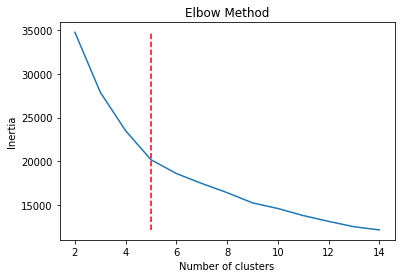

In [ ]:
import matplotlib.pyplot as plt

plt.plot(k_range,inertia_arr)

plt.vlines(5,ymin=inertia_arr.min()*0.9999, ymax=inertia_arr.max()*1.0003,linestyles='--',colors='r')
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

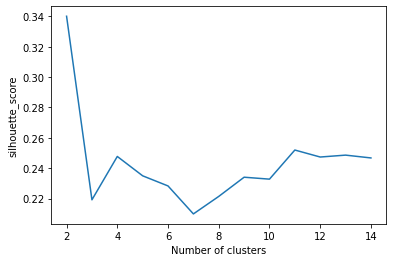

In [ ]:
plt.plot(k_range,silhouette_score_arr)

plt.xlabel("Number of clusters")
plt.ylabel("silhouette_score")
plt.show()

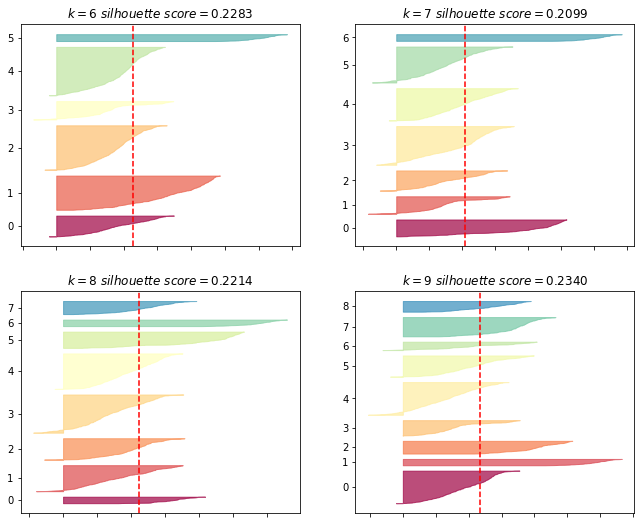

In [ ]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl

plt.figure(figsize=(11, 9))

for k in range(6,10):
    plt.subplot(2, 2, k - 5)
    
    y_pred = kmeans_per_k[k - 2].labels_
    silhouette_coefficients = silhouette_samples(data_scaled, y_pred)

    padding = len(data_scaled) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    # if k in (13, 14):
    #     plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    #     # plt.xlabel("Silhouette Coefficient")
    # else:
    plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_score_arr[k - 2], color="red", linestyle="--")
    plt.title(f"$k={k}\ silhouette\ score={silhouette_score_arr[k - 2]:.4f}$", fontsize=12)

plt.show()

In [ ]:
kmeans_per_k

[KMeans(n_clusters=2, random_state=300),
 KMeans(n_clusters=3, random_state=300),
 KMeans(n_clusters=4, random_state=300),
 KMeans(n_clusters=5, random_state=300),
 KMeans(n_clusters=6, random_state=300),
 KMeans(n_clusters=7, random_state=300),
 KMeans(random_state=300),
 KMeans(n_clusters=9, random_state=300),
 KMeans(n_clusters=10, random_state=300),
 KMeans(n_clusters=11, random_state=300),
 KMeans(n_clusters=12, random_state=300),
 KMeans(n_clusters=13, random_state=300),
 KMeans(n_clusters=14, random_state=300)]

In [ ]:
k7 = kmeans_per_k[5]
k7.labels_

array([6, 3, 3, ..., 0, 0, 5], dtype=int32)

In [ ]:
# k=4일 때 그룹별 구의 분포

k4= kmeans_per_k[2]
k4_res = {0: [], 1: [], 2: [], 3: [], 4: [] }
for i, (index, _) in enumerate(data.iterrows()):
    k4_res[k4.labels_[i]].append(index)

gus = ['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', 
      '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구']
for i, k in k4_res.items():
    sum = 0
    gu_dic = {key: 0 for key in gus}
    year_dic = {str(key): 0 for key in range(2014, 2021)}
    for index in k:
        year = index[:4]
        gu = index[8:]
        gu_dic[gu] += 1
        year_dic[year] += 1
    print(f'k={i}')
    for gu, cnt in gu_dic.items():
        if cnt != 0:
            print(f'{gu} {cnt}개')
            sum += cnt
    for year, cnt in year_dic.items():
        if cnt != 0:
            print(f'{year} {cnt}')
    print(f'합계 {sum}')
    

k=0
강서구 84개
노원구 84개
송파구 84개
2014 36
2015 36
2016 36
2017 36
2018 36
2019 36
2020 36
합계 252
k=1
금천구 84개
마포구 1개
서대문구 84개
성동구 9개
용산구 84개
종로구 84개
중구 84개
2014 60
2015 60
2016 60
2017 60
2018 60
2019 61
2020 69
합계 430
k=2
강동구 84개
강북구 84개
관악구 84개
광진구 84개
구로구 84개
도봉구 84개
동대문구 84개
동작구 84개
마포구 83개
서초구 84개
성동구 75개
성북구 84개
양천구 84개
영등포구 84개
은평구 84개
중랑구 84개
2014 192
2015 192
2016 192
2017 192
2018 192
2019 191
2020 183
합계 1334
k=3
강남구 84개
2014 12
2015 12
2016 12
2017 12
2018 12
2019 12
2020 12
합계 84
k=4
합계 0


In [ ]:
k4.cluster_centers_

array([[ 1.37809067e+00,  1.37655983e+00,  1.47077042e+00,
         1.48906931e+00, -6.84602287e-16,  1.78311664e+00,
         1.01897489e-01, -1.28763248e-01,  1.46815436e+00,
        -9.86041998e-02,  2.11465953e-01,  2.03678599e-01,
         1.30942063e+00,  2.90716870e-01, -6.15256200e-02,
         1.10300521e+00,  5.93594530e-01,  9.28062558e-01,
         3.89690130e-01,  3.81533816e-01,  1.21183887e-01,
         2.10051579e+00],
       [-1.11992113e+00, -1.23170516e+00, -1.13364181e+00,
        -1.26975286e+00,  3.77915658e-02, -1.23717838e+00,
        -3.65695764e-01,  2.90706877e-01, -1.12360414e+00,
        -9.79686673e-01, -8.65104215e-02, -1.17324925e-01,
        -1.28195202e+00,  3.20373104e-01, -8.86715510e-01,
        -9.73840258e-01, -8.17317536e-01, -8.18284222e-01,
        -6.03896387e-01,  2.35523150e-02,  1.34035673e-02,
        -9.29586875e-01],
       [ 6.05047571e-02,  1.09456974e-01,  4.05634624e-02,
         1.21356612e-01, -1.21816891e-02,  3.80414574e-02,
    

In [ ]:
#k=5일 때 그룹당 구의 분포

k5= kmeans_per_k[3]
k5_res = {0: [], 1: [], 2: [], 3: [], 4: []}
for i, (index, _) in enumerate(data.iterrows()):
    k5_res[k5.labels_[i]].append(index)

gus = ['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', 
      '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구']
for i, k in k5_res.items():
    sum = 0
    gu_dic = {key: 0 for key in gus}
    year_dic = {str(key): 0 for key in range(2014, 2021)}
    for index in k:
        year = index[:4]
        gu = index[8:]
        gu_dic[gu] += 1
        year_dic[year] += 1
    print(f'k={i}')
    for gu, cnt in gu_dic.items():
        if cnt != 0:
            print(f'{gu} {cnt}개')
            sum += cnt
    for year, cnt in year_dic.items():
        if cnt != 0:
            print(f'{year} {cnt}')
    print(f'합계 {sum}')
    

k=0
강서구 84개
노원구 84개
송파구 84개
2014 36
2015 36
2016 36
2017 36
2018 36
2019 36
2020 36
합계 252
k=1
강동구 37개
강북구 35개
관악구 37개
광진구 44개
구로구 38개
도봉구 27개
동대문구 54개
동작구 37개
마포구 60개
서대문구 4개
서초구 43개
성동구 54개
성북구 38개
양천구 38개
영등포구 55개
은평구 38개
중랑구 35개
2016 31
2017 74
2018 183
2019 192
2020 194
합계 674
k=2
강남구 84개
2014 12
2015 12
2016 12
2017 12
2018 12
2019 12
2020 12
합계 84
k=3
강동구 47개
강북구 49개
관악구 47개
광진구 40개
구로구 46개
도봉구 57개
동대문구 30개
동작구 47개
마포구 24개
서대문구 3개
서초구 41개
성동구 30개
성북구 46개
양천구 46개
영등포구 29개
은평구 46개
중랑구 49개
2014 195
2015 192
2016 161
2017 118
2018 11
합계 677
k=4
금천구 84개
서대문구 77개
용산구 84개
종로구 84개
중구 84개
2014 57
2015 60
2016 60
2017 60
2018 58
2019 60
2020 58
합계 413


# 클러스터 개수가 5개일 때 2018 년을 기준으로 k=1,3 클러스터가 나뉘는 이유

In [ ]:
#k=5일 때의 각 중심의 위치
kmeans_per_k[3].cluster_centers_

array([[ 1.37809067e+00,  1.37655983e+00,  1.47077042e+00,
         1.48906931e+00, -6.84602287e-16,  1.78311664e+00,
         1.01897489e-01, -1.28763248e-01,  1.46815436e+00,
        -9.86041998e-02,  2.11465953e-01,  2.03678599e-01,
         1.30942063e+00,  2.90716870e-01, -6.15256200e-02,
         1.10300521e+00,  5.93594530e-01,  9.28062558e-01,
         3.89690130e-01,  3.81533816e-01,  1.21183887e-01,
         2.10051579e+00],
       [-1.92714187e-01, -9.45070184e-02, -3.72863715e-01,
         1.26910691e-01,  8.08260523e-01, -7.77790864e-02,
        -7.54119539e-02,  1.00902434e-01, -3.70805268e-02,
         3.17053555e-01,  8.04526556e-01,  8.15718092e-01,
         9.36462398e-02, -3.00438928e-01,  1.87256961e-01,
         1.56469886e-02, -5.50436487e-02, -7.38292778e-02,
        -1.04723815e-01,  4.59678482e-03, -1.52758599e-01,
        -2.11708331e-01],
       [ 6.37784426e-01,  4.37196875e-01,  7.46668732e-01,
         1.05458868e-01, -3.18052463e-16,  3.79690549e-01,
    

In [ ]:
#k=1과 k=3의 중심값의 차이 
kmeans_per_k[3].cluster_centers_[1]-kmeans_per_k[3].cluster_centers_[3]

array([-0.488248, -0.383946, -0.808772,  0.023829,  1.613285, -0.215251,
        0.133419,  0.311095,  0.063387, -0.059898,  1.66533 ,  1.658846,
       -0.070956,  0.174969, -0.251111,  0.171384,  0.06668 ,  0.09153 ,
        0.097382,  0.585813,  0.195004, -0.016888])

In [ ]:
print(data.iloc[:1200,2].mean())
print(data.iloc[1200:,2].mean())
print(data["출생"].mean())


256.3675
176.88
222.30142857142857


In [ ]:
print(data.iloc[:1200,11].mean())
print(data.iloc[1200:,11].mean())
print(data["누적 보관소"].mean())

135.2675
789.1355555555556
32.268095238095235


# K=4 일 때 강남 비교

In [ ]:
np.set_printoptions(precision=6, suppress=True)
kmeans_per_k[2].cluster_centers_[3]-kmeans_per_k[2].cluster_centers_[0]

array([-0.740306, -0.939363, -0.724102, -1.38361 ,  0.      , -1.403426,
        3.675878, -0.106622,  0.865009, -0.188174,  0.225186,  0.174606,
       -0.91284 ,  3.385198, -0.428958,  1.634691,  3.094913,  2.248232,
        3.899671,  2.95983 ,  3.394702, -0.533794])

In [ ]:
kmeans_per_k[2].cluster_centers_[3]-kmeans_per_k[2].cluster_centers_[1]

array([ 1.757706,  1.668902,  1.880311,  1.375212, -0.037792,  1.616869,
        4.143471, -0.526092,  3.456767,  0.692908,  0.523163,  0.495609,
        1.678533,  3.355541,  0.396232,  3.711537,  4.505825,  3.994578,
        4.893258,  3.317812,  3.502482,  2.496309])

In [ ]:
kmeans_per_k[2].cluster_centers_[3]-kmeans_per_k[2].cluster_centers_[2]

array([ 0.57728 ,  0.32774 ,  0.706105, -0.015898,  0.012182,  0.341649,
        3.917027, -0.180825,  2.39524 , -0.639254,  0.476209,  0.402762,
        0.255687,  4.065568, -0.818814,  2.804542,  3.769447,  3.287852,
        4.438412,  3.631431,  3.764489,  1.762533])

# k=4일 때 노원,송파,강서구 묶인 이유

In [ ]:
kmeans_per_k[2].cluster_centers_[0]-kmeans_per_k[2].cluster_centers_[1]

array([ 2.498012,  2.608265,  2.604412,  2.758822, -0.037792,  3.020295,
        0.467593, -0.41947 ,  2.591759,  0.881082,  0.297976,  0.321004,
        2.591373, -0.029656,  0.82519 ,  2.076845,  1.410912,  1.746347,
        0.993587,  0.357982,  0.10778 ,  3.030103])

In [ ]:
kmeans_per_k[2].cluster_centers_[0]-kmeans_per_k[2].cluster_centers_[2]

array([ 1.317586,  1.267103,  1.430207,  1.367713,  0.012182,  1.745075,
        0.241149, -0.074203,  1.530231, -0.45108 ,  0.251023,  0.228156,
        1.168527,  0.68037 , -0.389856,  1.169851,  0.674534,  1.03962 ,
        0.53874 ,  0.6716  ,  0.369787,  2.296327])

# K=4일 때 금천구,서대문구,용산구,종로구,중구 묶인 이유


In [ ]:
kmeans_per_k[2].cluster_centers_[1]-kmeans_per_k[2].cluster_centers_[2]

array([-1.180426, -1.341162, -1.174205, -1.391109,  0.049973, -1.27522 ,
       -0.226444,  0.345267, -1.061527, -1.332163, -0.046954, -0.092847,
       -1.422846,  0.710027, -1.215046, -0.906994, -0.736378, -0.706726,
       -0.454846,  0.313619,  0.262006, -0.733776])